# RDP + Greengenes vs. BLAST + MEGAN 

author: Walter Xie

date: 25 May 2016

## Introduction

There are some publications [?]() recently to highlight the taxonomic classification using Greengenes database is better than BLAST for 16S data set. I make a toy example here using [ComMA](https://github.com/walterxie/ComMA), to show how these two classifier are performed for a particular dataset.

The content of this tutorial includes how to interpret the community matrix of 16S (also known as OTU table) with taxonomic classifications, and create bar charts. 


In [1]:
suppressMessages(library(ComMA))

## Data set

This 16S data set is from [Miyake et al 2015](http://onlinelibrary.wiley.com/doi/10.1111/mec.13050/abstract), which was
sequenced on a Roche 454 GS FLX Titanium and processed before OTU clustering.

Their QC steps performed were as follows:
1. use MOTHUR to denoise (320min, 800max flows);
2. trim barcodes and primers;
3. remove homopolymers of more than 8bp;
4. remove sequences < 200bp lengths;
5. remove chimeric sequences using UCHIME;
6. taxonomic calling against Greengenes May 2013 release;
7. subsequent removal of chloroplast, mictochondrial, and non-bacterial sequences.

## OTU clustering and community matrix

[UPARSE](http://www.ncbi.nlm.nih.gov/pubmed/23955772) pipeline is used to create OTUs. The version of USEARCH used is 8.0.1623, and the threshold is set to 97%.

The community matrix (OTU table) in the result is saved as [miyake.454.16s.otus.csv](https://github.com/walterxie/ComMA/blob/master/data-raw/miyake.454.16s.otus.csv). 

In [2]:
#getwd()
cm <- readCommunityMatrix("../data-raw/miyake.454.16s.otus.csv", 
                          "16S", minAbund=1)
cm[1:3,]


Upload 16S community matrix : 59 samples excluding row names from column 1, 2682 OTUs excluding column names from row 1, from file ../data-raw/miyake.454.16s.otus.csv 
Remove 0 from rows having minimum abundance < 1 !


,Agah01,Agah02,Agah03,Agah04,Anig01,Anig02,Anig03,Anig04,Asoh01,Asoh02,ellip.h,Zdes04,Zdes05,Zxan01,Zxan02,Zxan03,Zxan04,Zxan05,Zxan06,Zxan07,Zxan08
Agah01_H0COW3M02H2QER,379,0,6,16,18,0,1,2,110,18,⋯,395,371,437,2540,2619,221,361,650,76,1
Agah01_H2ZDNKJ02G8AL6,961,0,60,24,9,4,1,3,262,3,⋯,0,1275,19,627,16,28,29,1433,20,2
Agah01_H0COW3M02HMT2E,448,0,0,2,0,1,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [3]:
summaryCM(cm)

,total
reads,202430
OTUs,2682
samples,59
Shannon,29.45
singletons,939
doubletons,353


## Taxonomic classifier

The taxonomy of OTUs is first classified by the RDP classifier [RDP classifier](https://rdp.cme.msu.edu/classifier/) using the latest version of Greengenes database [Greengenes](http://greengenes.lbl.gov/) (May 2013). And then, the second taxonomy of same OTUs is classified by [BLAST](https://blast.ncbi.nlm.nih.gov/) and interpreted by [MEGAN](http://ab.inf.uni-tuebingen.de/software/).

The table of taxonomy from _kingdom_ to _genus_ is uploaded as below, where MEGAN repeats the last classified taxonomy at the higher rank through the lineage for all unclassified taxonomy, but RDP keeps them in blank.

### BLAST + MEGAN

__Note:__ Uncultured Bacteria ([taxid:77133](http://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=77133)) is excluded during BLAST in order to give more accurate taxonomic classification.

The classification without excluding Uncultured Bacteria provides much worse result for this 16S dataset.

In [4]:
#BLAST
tt.megan <- readTaxaTable("../data-raw/miyake.454.16s.megan.txt", 
                          "16S megan taxa table", taxa.group="all")
# 1st column is taxonomic lineage path
tt.megan[1:3,-1]


Upload 16S megan taxa table taxonomy table : 7 columns excluding row names from column 1, 2682 OTUs excluding column names from row 1, from file ../data-raw/miyake.454.16s.megan.txt 


,kingdom,phylum,class,order,family,genus
Agah01_H0COW3M02F0MYH,Bacteria,Firmicutes,Firmicutes,Firmicutes,Firmicutes,Firmicutes
Agah01_H0COW3M02F0SWP,root,root,root,root,root,root
Agah01_H0COW3M02F1ZMK,Bacteria,Proteobacteria,Gammaproteobacteria,Gammaproteobacteria,Gammaproteobacteria,Gammaproteobacteria


### RDP + Greengenes

In [5]:
# RDP
tt.rdp <- readTaxaTable("../data-raw/miyake.454.16s.greengenes.txt", 
                        "16S rdp taxa table", taxa.group="all")
# 1st column is taxonomic lineage path
tt.rdp[1:3,-1]


Upload 16S rdp taxa table taxonomy table : 9 columns excluding row names from column 1, 2682 OTUs excluding column names from row 1, from file ../data-raw/miyake.454.16s.greengenes.txt 


,confidence,kingdom,phylum,class,order,family,genus,species
Agah01_H0COW3M02F0MYH,0.53,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Coprococcus,
Agah01_H0COW3M02F0SWP,0.79,Bacteria,TM7,,,,,
Agah01_H0COW3M02F1ZMK,0.91,Bacteria,Proteobacteria,Gammaproteobacteria,Legionellales,,,


## Taxonomic assignments

The number of reads of OTUs assigned to different taxonomies is summarised below regarding to classifiers. Because this dataset is preprossed, RDP using 0.5 confidence threshold do not have any unclassified taxonomy.


In [6]:
# return a list of taxa assignments, names = c("megan", "rdp.5", "rdp.8")
getTaxaAssignList <- function(cm, tt.megan, tt.rdp, taxa.group="all", rank="kingdom") {
    cm.taxa <- mergeCMTaxa(cm, tt.megan)
    ta.megan <- assignTaxaByRank(cm.taxa)
    sum(ta.megan[[rank]])

    cm.taxa <- mergeCMTaxa(cm, tt.rdp, classifier="RDP")
    ta.rdp.8 <- assignTaxaByRank(cm.taxa)
    sum(ta.rdp.8[[rank]])

    cm.taxa <- mergeCMTaxa(cm, tt.rdp, classifier="RDP", min.conf=0.5)
    ta.rdp.5 <- assignTaxaByRank(cm.taxa)
    sum(ta.rdp.5[[rank]])

    list(megan=ta.megan, rdp.5=ta.rdp.5, rdp.8=ta.rdp.8)
}

getReads <- function(ta.list, rank="kingdom") {
    reads.megan <- ta.list[["megan"]][[rank]]
    reads.megan$classifier <- "MEGAN"
    reads.megan[,rank] <- rownames(reads.megan)
    reads.rdp.8 <- ta.list[["rdp.8"]][[rank]]
    reads.rdp.8$classifier <- "RDP 0.8"
    reads.rdp.8[,rank] <- rownames(reads.rdp.8)
    reads.rdp.5 <- ta.list[["rdp.5"]][[rank]]
    reads.rdp.5$classifier <- "RDP 0.5"
    reads.rdp.5[,rank] <- rownames(reads.rdp.5)

    reads <- rbind(reads.megan, reads.rdp.8, reads.rdp.5)
}

### assign taxonomy at different rank level

In [7]:
ta.list <- getTaxaAssignList(cm, tt.megan, tt.rdp)

Merge 2682 rows in community matrix with 2682 rows in taxa table, get 2682 classifications.
Set 914 rows as 'unclassified' from the total of 2682 in RDP taxa table, whose confidence < 0.8 .
Merge 2682 rows in community matrix with 2682 rows in taxa table, get 2682 classifications.
Set 0 rows as 'unclassified' from the total of 2682 in RDP taxa table, whose confidence < 0.5 .
Merge 2682 rows in community matrix with 2682 rows in taxa table, get 2682 classifications.


In [8]:
names(ta.list[["megan"]])

[1] "kingdom" "phylum"  "class"   "order"   "family"  "genus"

In [9]:
ta.list[["megan"]][["kingdom"]]

,total
Bacteria,194527
Eukaryota,62
unclassified,7841


In [10]:
ta.list[["rdp.8"]][["phylum"]]

,total
Acidobacteria,87
Actinobacteria,6761
Bacteroidetes,3860
Chlamydiae,8
Chloroflexi,13
Cyanobacteria,2376
Deferribacteres,15
Elusimicrobia,10
Fibrobacteres,1
Firmicutes,120806


### Abundance percentage bar of RDP using 0.5 and 0.8 confidence threshold
As you can see in the percentage bar, using 0.8 has a piece of "unclassified" bar comparing with 0.5.

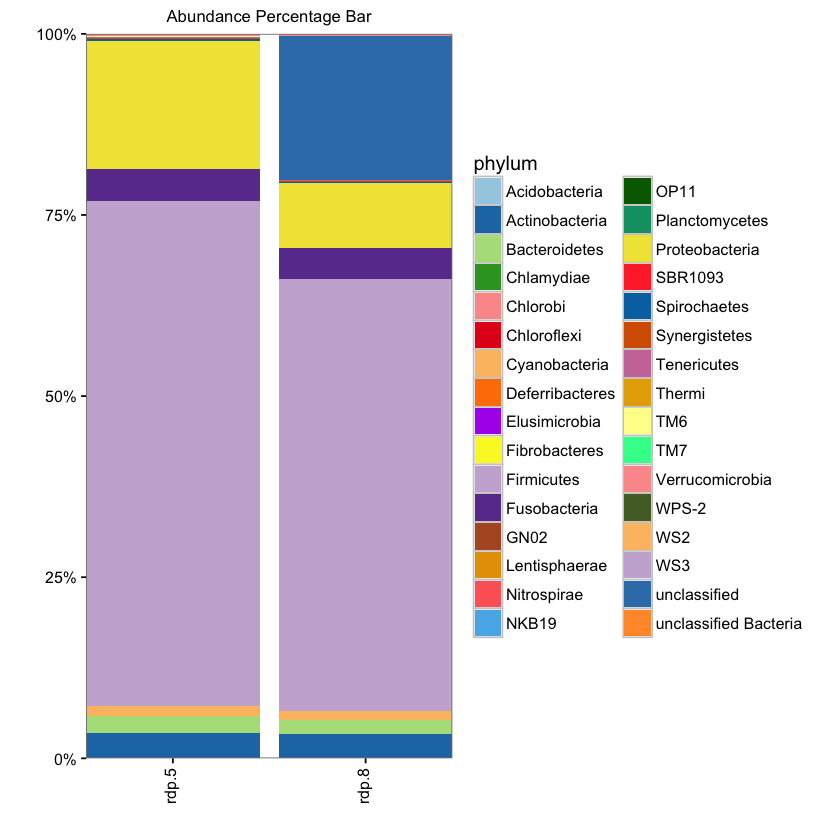

In [11]:
ta <- merge(ta.list[["rdp.5"]][["phylum"]], ta.list[["rdp.8"]][["phylum"]], 
            by = "row.names", all = TRUE)
ta[is.na(ta)] <- 0
colnames(ta) <- c("phylum", "rdp.5", "rdp.8")
bar.per <- ggPercentageBarChart(ta, melt.id="phylum", verbose=F, 
                                title="Abundance Percentage Bar")
bar.per$gg.plot

### abundance summary

In [12]:
kingdom <- getReads(ta.list)
kingdom

,total,classifier,kingdom
Bacteria,194527,MEGAN,Bacteria
Eukaryota,62,MEGAN,Eukaryota
unclassified,7841,MEGAN,unclassified
Bacteria1,162261,RDP 0.8,Bacteria
unclassified1,40169,RDP 0.8,unclassified
Bacteria2,202430,RDP 0.5,Bacteria


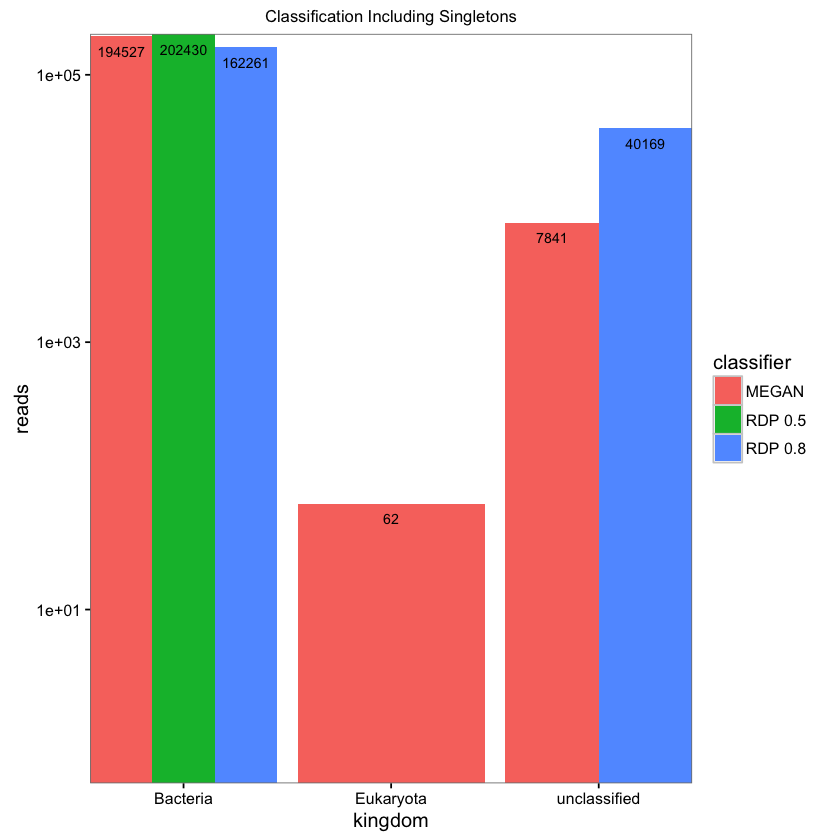

In [13]:
bar.kingdom <- ggBarChart(kingdom, x.id="kingdom", y.id="total",  
                        fill.id="classifier", y.trans="log", y.lab="reads", 
                        title="Classification Including Singletons", verbose=F)
bar.kingdom <- bar.kingdom + ggAddNumbers(label.id="total", text.size=3, 
                                          hjust=0.5, vjust=2)
bar.kingdom

## Bacteria community without singleton 

In [14]:
# no singleton
cm.min2 <- readCommunityMatrix("../data-raw/miyake.454.16s.otus.csv", "16S")


Upload 16S community matrix : 59 samples excluding row names from column 1, 2682 OTUs excluding column names from row 1, from file ../data-raw/miyake.454.16s.otus.csv 
Remove 939 from rows having minimum abundance < 2 !


In [15]:
summaryCM(cm.min2)

,total
reads,201491
OTUs,1743
samples,59
Shannon,28.41
singletons,0
doubletons,353


In [16]:
# no singleton
ta.list <- getTaxaAssignList(cm.min2, tt.megan, tt.rdp) 

Merge 1743 rows in community matrix with 2682 rows in taxa table, get 1743 classifications.
Set 914 rows as 'unclassified' from the total of 2682 in RDP taxa table, whose confidence < 0.8 .
Merge 1743 rows in community matrix with 2682 rows in taxa table, get 1743 classifications.
Set 0 rows as 'unclassified' from the total of 2682 in RDP taxa table, whose confidence < 0.5 .
Merge 1743 rows in community matrix with 2682 rows in taxa table, get 1743 classifications.


In [17]:
kingdom.min2 <- getReads(ta.list)
kingdom.min2

,total,classifier,kingdom
Bacteria,193839,MEGAN,Bacteria
Eukaryota,49,MEGAN,Eukaryota
unclassified,7603,MEGAN,unclassified
Bacteria1,161650,RDP 0.8,Bacteria
unclassified1,39841,RDP 0.8,unclassified
Bacteria2,201491,RDP 0.5,Bacteria


In [18]:
merge.kingdom <- merge(kingdom, kingdom.min2, by=c("kingdom", "classifier"))
# informal code to select Bacteria
bacteria <- merge.kingdom[merge.kingdom=="Bacteria",]
bacteria$percentage <- bacteria$total.y / bacteria$total.x
bacteria$singletons <- 1 - bacteria$percentage
bacteria

,kingdom,classifier,total.x,total.y,percentage,singletons
1,Bacteria,MEGAN,194527,193839,0.9964632,0.003536784
2,Bacteria,RDP 0.5,202430,201491,0.9953614,0.004638641
3,Bacteria,RDP 0.8,162261,161650,0.9962345,0.003765538


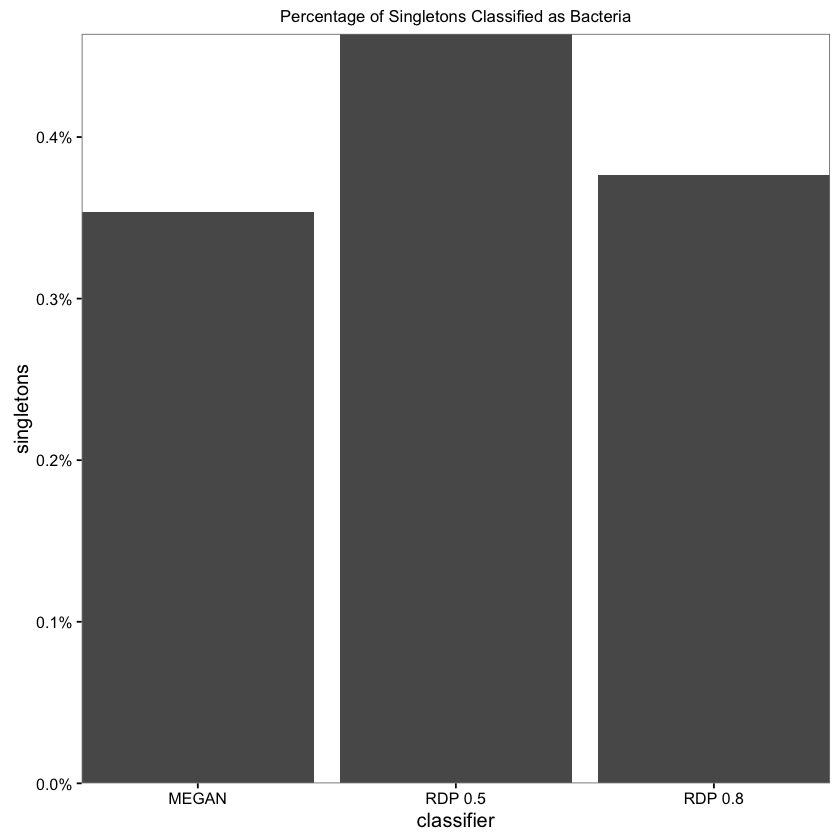

In [19]:
ggBarChart(bacteria, x.id="classifier", y.id="singletons", y.trans="per", 
           title="Percentage of Singletons Classified as Bacteria", verbose=F)

## Classification comparison

In [20]:
# select Bacteria
tt.megan <- readTaxaTable("../data-raw/miyake.454.16s.megan.txt", 
                          "16S megan taxa table", taxa.group="Bacteria")
tt.rdp <- readTaxaTable("../data-raw/miyake.454.16s.greengenes.txt", 
                        "16S rdp taxa table", taxa.group="Bacteria")


Upload 16S megan taxa table taxonomy table : 7 columns excluding row names from column 1, 2682 OTUs excluding column names from row 1, from file ../data-raw/miyake.454.16s.megan.txt 
Select 2069 classifications, by given taxa.group = Bacteria , rank = kingdom , include = TRUE .

Upload 16S rdp taxa table taxonomy table : 9 columns excluding row names from column 1, 2682 OTUs excluding column names from row 1, from file ../data-raw/miyake.454.16s.greengenes.txt 


In [21]:
n.taxa.df <- data.frame(row.names=c("MEGAN", "RDP 0.5", "RDP 0.8"))
reads.df <- data.frame(row.names=c("MEGAN", "RDP 0.5", "RDP 0.8"))
r <- 1
for (ta.name in c(c("megan", "rdp.5", "rdp.8"))) {
    print(paste("Classifier :", ta.name))
    ta.df <- ta.list[[ta.name]]
    # start from phylum
    for (ra in names(ta.df)[-1]) {
        ta <- ta.df[[ra]]
        n.uncl <- length(grep("unclassified", rownames(ta), ignore.case = T))    
        print(paste(ra, ": total taxa =", nrow(ta), ", where", 
                    n.uncl, "unclassified taxa."))    
        # not count "unclassified"
        n.taxa.df[r, ra] <- nrow(ta) - n.uncl

        ta <- subset(ta, !grepl("unclassified", rownames(ta), ignore.case = T))
        reads.df[r, ra] <- sum(ta[,"total"])
    }
    r <- r + 1
}

[1] "Classifier : megan"
[1] "phylum : total taxa = 22 , where 2 unclassified taxa."
[1] "class : total taxa = 46 , where 4 unclassified taxa."
[1] "order : total taxa = 84 , where 6 unclassified taxa."
[1] "family : total taxa = 137 , where 4 unclassified taxa."
[1] "genus : total taxa = 192 , where 4 unclassified taxa."
[1] "Classifier : rdp.5"
[1] "phylum : total taxa = 22 , where 1 unclassified taxa."
[1] "class : total taxa = 58 , where 6 unclassified taxa."
[1] "order : total taxa = 108 , where 21 unclassified taxa."
[1] "family : total taxa = 182 , where 42 unclassified taxa."
[1] "genus : total taxa = 256 , where 94 unclassified taxa."
[1] "Classifier : rdp.8"
[1] "phylum : total taxa = 23 , where 2 unclassified taxa."
[1] "class : total taxa = 56 , where 6 unclassified taxa."
[1] "order : total taxa = 103 , where 20 unclassified taxa."
[1] "family : total taxa = 163 , where 38 unclassified taxa."
[1] "genus : total taxa = 204 , where 83 unclassified taxa."


### classified taxonomy under Bacteria (no singletons)

In [22]:
n.taxa.df

,phylum,class,order,family,genus
MEGAN,20,42,78,133,188
RDP 0.5,21,52,87,140,162
RDP 0.8,21,50,83,125,121


Using id as id variables


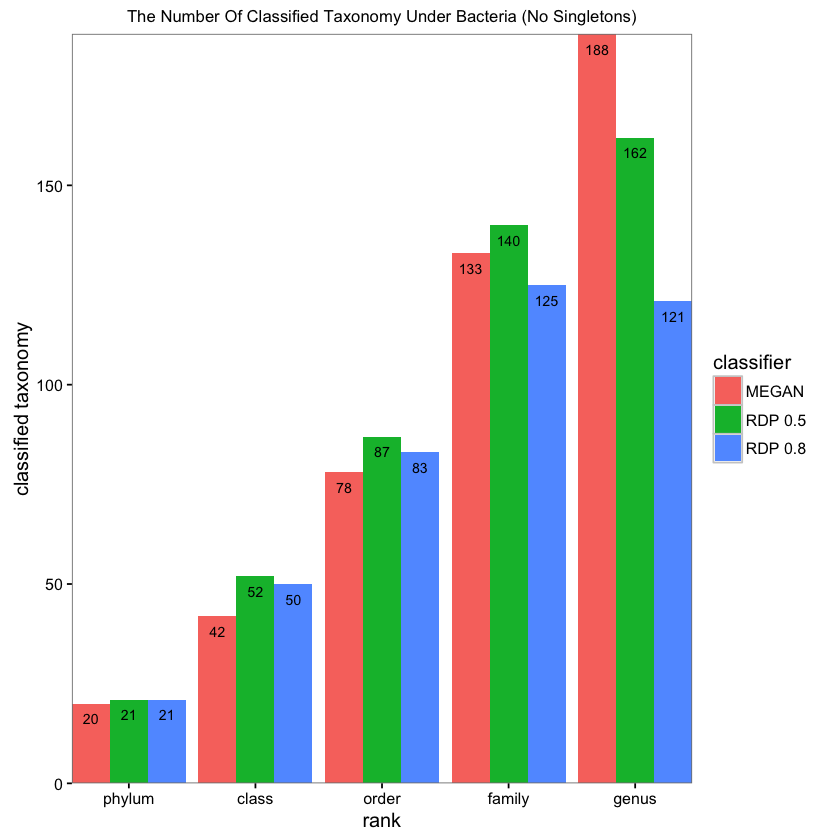

In [23]:
library("reshape2")
n.taxa.df$id = rownames(n.taxa.df)
n.taxa.melt <- melt(n.taxa.df)

ggBarChart(n.taxa.melt, x.id="variable", y.id="value", fill.id="id", 
           x.lab="rank", y.lab="classified taxonomy",
           title="The Number Of Classified Taxonomy Under Bacteria (No Singletons)",
           legend.title="classifier", verbose=F) + 
ggAddNumbers(label.id="value", text.size=3, hjust=0.5, vjust=2)

### reads of classified OTUs under Bacteria (no singletons)

In [24]:
reads.df

,phylum,class,order,family,genus
MEGAN,193854,193812,193626,133972,133071
RDP 0.5,201458,201359,200098,189639,135772
RDP 0.8,161617,161545,160936,152293,121367


Using id as id variables


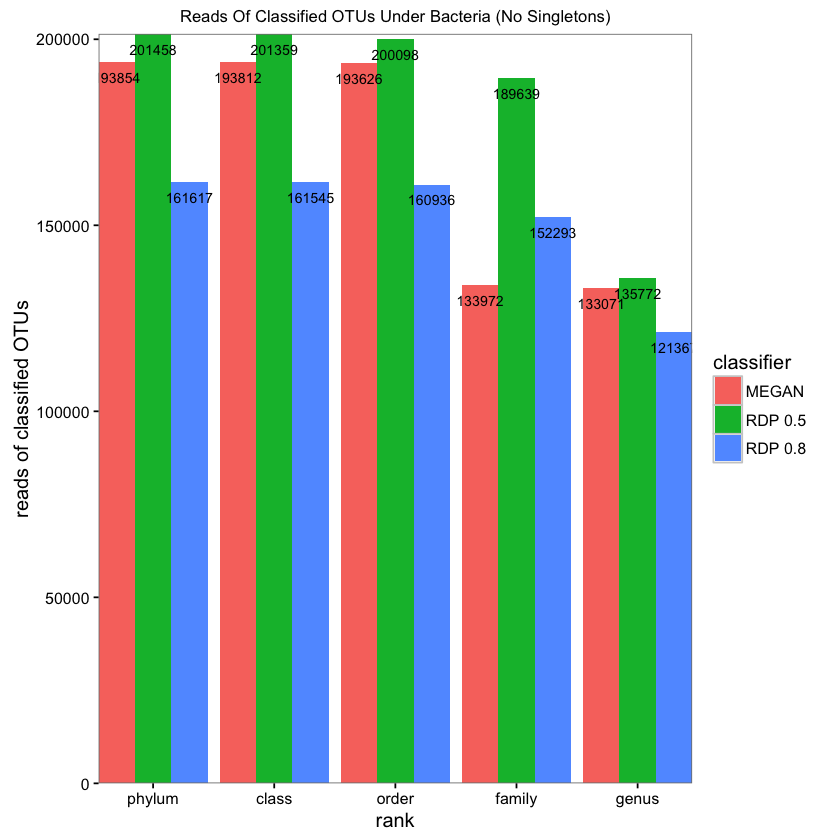

In [25]:
reads.df$id = rownames(reads.df)
reads.melt <- melt(reads.df)

ggBarChart(reads.melt, x.id="variable", y.id="value", fill.id="id", 
           x.lab="rank", y.lab="reads of classified OTUs", 
           title="Reads Of Classified OTUs Under Bacteria (No Singletons)",
           legend.title="classifier", verbose=F) + 
ggAddNumbers(label.id="value", text.size=3, hjust=0.5, vjust=2)

## Results

* Excluding uncultured bacteria (taxid:77133) during BLAST will increase the accuracy of taxonomic classification for 16S dataset.

* RDP using 0.5 confidence threshold picks up more singletons than RDP 0.8 and MEGAN, if singletone are not removed.

* RDP + Greengenes can detect more or similar number of taxonomies than MEGAN before down to family level; at the family level the comparison is varied according to RDP confidence threshold; below family RDP suddenly loses its power, which I presume it is caused by the lack of reference below family level.  

* RDP using 0.5 confidence threshold always keeps more reads from classified OTUs than MEGAN, but RDP 0.8 has a big gap to reach their abundance above family level; at the family level the reads classified by MEGAN is significately dropped, this mean many abundant OTUs are unable to assign the classification at family level; the same drops for RDP happen below family level. 

## Take-home message
RDP + Greengenes using 0.8 confidence threshold is recommanded to make the taxonomic classification for 16S dataset. But dropping confidence threshold with concerns could increase the abundance of classified taxonomy above genus.